In [1]:
!pwd

/workspaces/tensorflow-wavelets/src


In [2]:
import cv2
import tensorflow as tf

from tensorflow_wavelets.utils.models import *
from tensorflow_wavelets.utils.mse import *
from tensorflow_wavelets.utils.data import *

from matplotlib import pyplot as plt
import numpy as np


In [3]:
img = cv2.imread("../Development/input/Lenna_orig.png", 0)
img = cv2.resize(img,(240,240))
img_t = np.expand_dims(img, axis=-1)
img_ex = np.expand_dims(img_t, axis=0)
print(img_ex.shape)


(1, 240, 240, 1)


In [4]:
dwt = DWT.DWT(wavelet_name="haar",concat=0)(tf.dtypes.cast(img_ex, tf.float32))
print(dwt.shape)
idwt = DWT.IDWT(wavelet_name="haar",splited=1)(tf.dtypes.cast(dwt, tf.float32))
print(idwt.shape)

2022-05-18 22:13:23.626201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 22:13:23.638303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 22:13:23.639121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 22:13:23.640806: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

(1, 120, 120, 4)
(1, 240, 240, 1)


In [5]:

def pyramid_avg_pool_2d(input, levels=4):
    plt.figure(figsize=(16,8))
    columns = levels
    for idx in range(levels):
        plt.subplot(1, columns, idx + 1)
        plt.imshow(input[0,:,:,0], cmap='gray')
        input = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same')(tf.dtypes.cast(input, tf.float32))
        # input = np.expand_dims(input, axis=-1)
        


def pyramid(layer, input, levels=4):
    plt.figure(figsize=(16,8))
    columns = levels
    for idx in range(levels):
        plt.subplot(1, columns, idx + 1)
        plt.imshow(input[0,:,:,0], cmap='gray')
        coeffs = layer(tf.dtypes.cast(input, tf.float32))
        LL1 = coeffs[:,:,:,0]
        input = np.expand_dims(LL1, axis=-1)
        # print(input.shape)

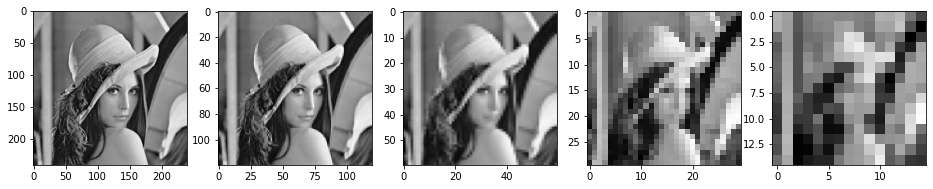

In [6]:
pyramid_avg_pool_2d(img_ex, levels=5)

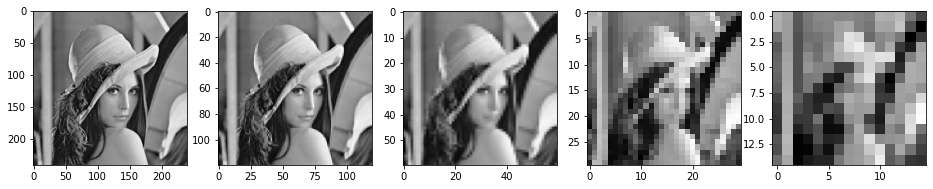

In [7]:
pyramid(DWT.DWT(wavelet_name="haar",concat=0), img_ex, levels=5)

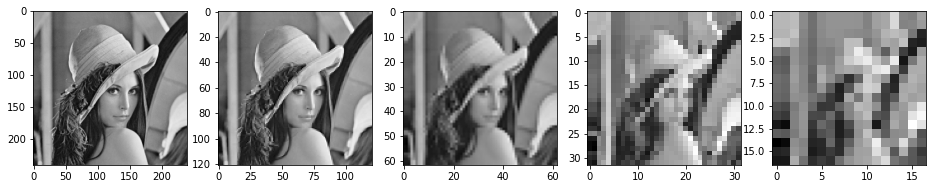

In [8]:
pyramid(DWT.DWT(wavelet_name="db2",concat=0), img_ex, levels=5)

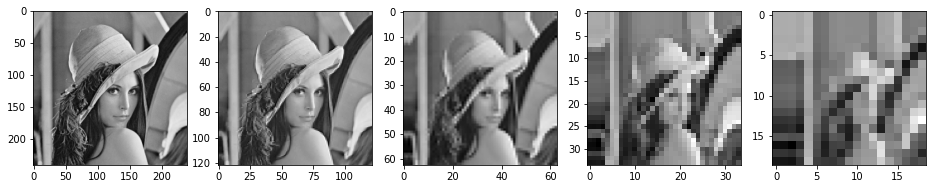

In [9]:
pyramid(DWT.DWT(wavelet_name="db3",concat=0), img_ex, levels=5)

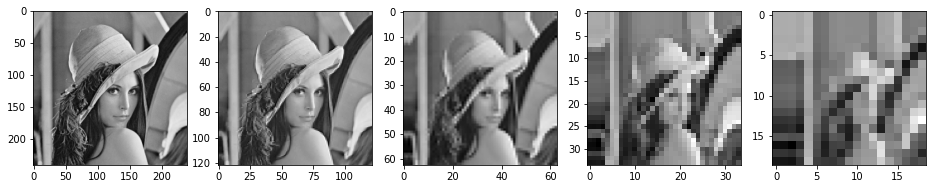

In [10]:
pyramid(DWT.DWT(wavelet_name="sym3",concat=0), img_ex, levels=5)

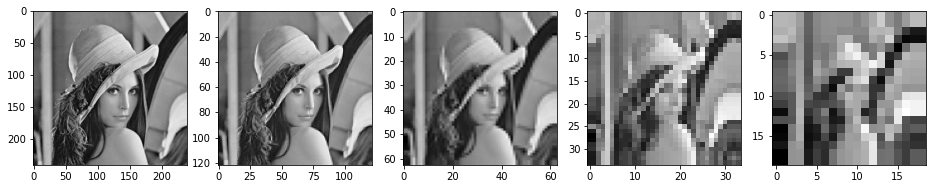

In [11]:
pyramid(DWT.DWT(wavelet_name="bior1.3",concat=0), img_ex, levels=5)